In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data_train=pd.read_csv(r'C:\Users\Zedd\Desktop\Python\House prices\train.csv')

In [3]:
data_test=pd.read_csv(r'C:\Users\Zedd\Desktop\Python\House prices\test.csv')

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
import seaborn as sns

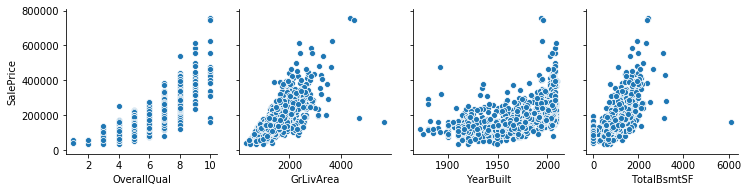

In [7]:
sns.pairplot(x_vars=['OverallQual','GrLivArea','YearBuilt','TotalBsmtSF'],y_vars=['SalePrice'],data=data_train,dropna=True)

In [8]:
data_train.drop(data_train[(data_train['OverallQual']<5) & (data_train['SalePrice']>200000)].index,inplace=True)

In [9]:
data_train.drop(data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<200000)].index,inplace=True)
data_train.drop(data_train[(data_train['YearBuilt']<1900) & (data_train['SalePrice']>400000)].index,inplace=True)
data_train.drop(data_train[(data_train['TotalBsmtSF']>6000) & (data_train['SalePrice']<200000)].index,inplace=True)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1198 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

In [11]:
data_train.reset_index(drop=True,inplace=True)

In [12]:
data1=pd.concat([data_train,data_test],axis=0)

In [13]:
data1.reset_index(drop=True,inplace=True)

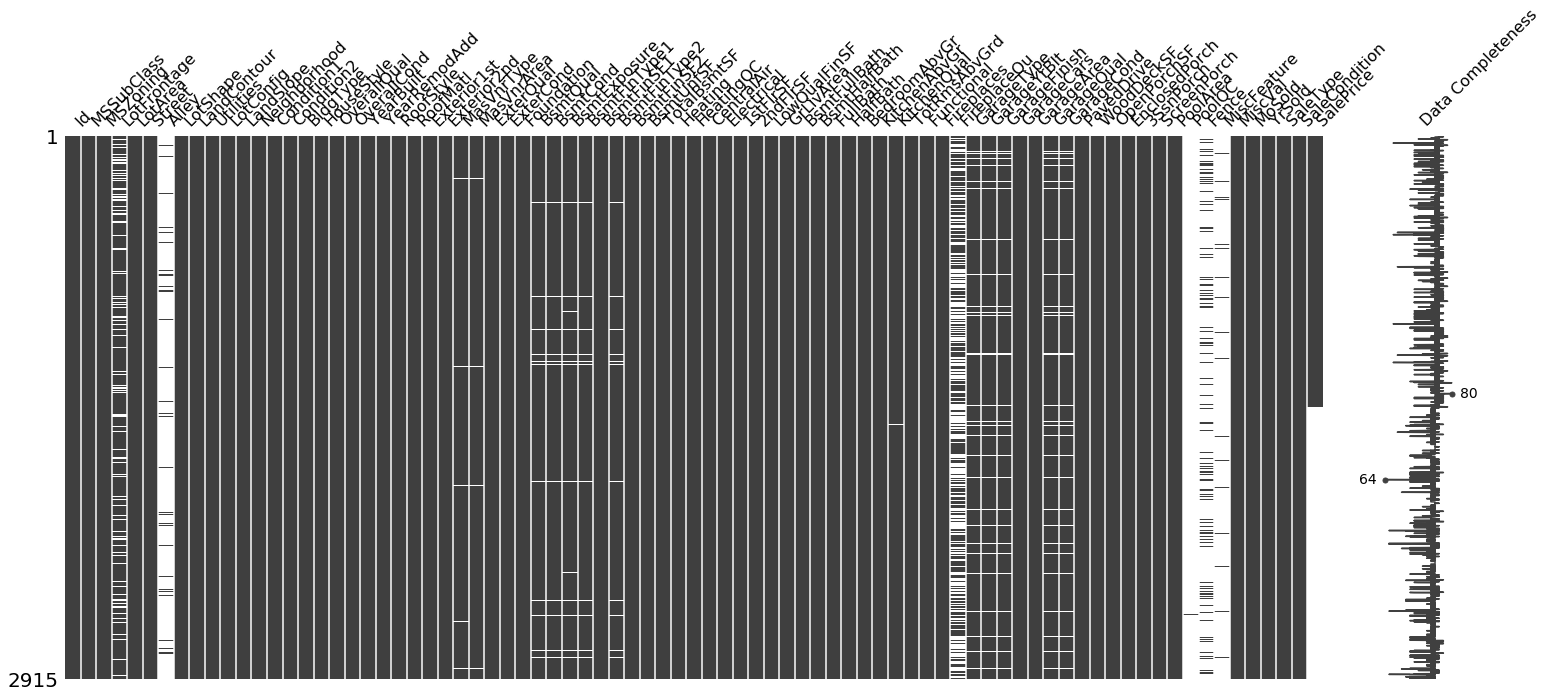

In [14]:
msno.matrix(data1,labels=True)

In [15]:
count=data1.isnull().sum().sort_values(ascending=False)
ratio=count/len(data1)

In [16]:
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])

In [17]:
nulldata.drop(nulldata[nulldata['count']==0].index,inplace=True)

In [18]:
nulldata

,count,ratio
PoolQC,2906,0.996913
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
SalePrice,1459,0.500515
FireplaceQu,1420,0.487136
LotFrontage,485,0.166381
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


In [19]:
corrmat=data_train.corr()

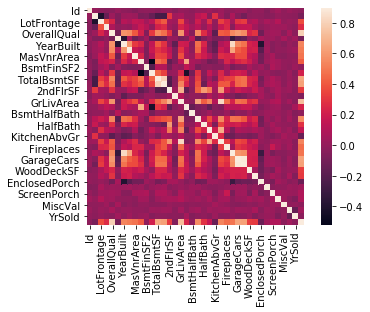

In [20]:
sns.heatmap(corrmat,vmax=0.9,square=True)

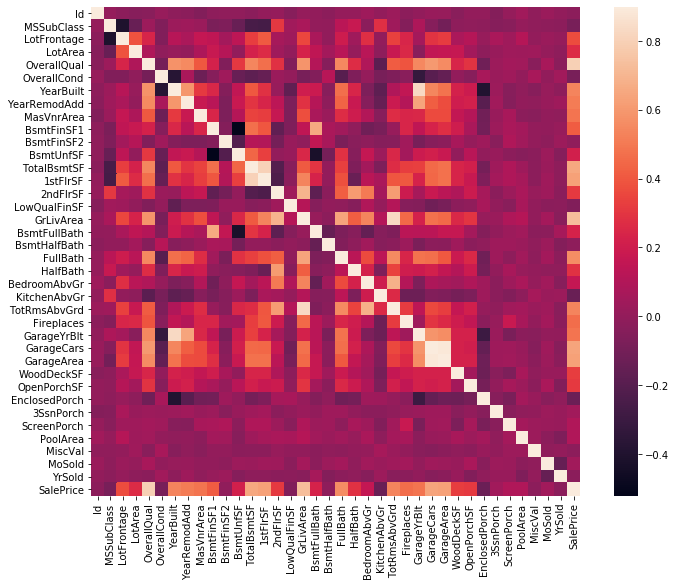

In [21]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [22]:
def fill_missings(res):

    res['Alley'] = res['Alley'].fillna('missing')
    res['PoolQC'] = res['PoolQC'].fillna(res['PoolQC'].mode()[0])
    res['MasVnrType'] = res['MasVnrType'].fillna('None')
    res['BsmtQual'] = res['BsmtQual'].fillna(res['BsmtQual'].mode()[0])
    res['BsmtCond'] = res['BsmtCond'].fillna(res['BsmtCond'].mode()[0])
    res['FireplaceQu'] = res['FireplaceQu'].fillna(res['FireplaceQu'].mode()[0])
    res['GarageType'] = res['GarageType'].fillna('missing')
    res['GarageFinish'] = res['GarageFinish'].fillna(res['GarageFinish'].mode()[0])
    res['GarageQual'] = res['GarageQual'].fillna(res['GarageQual'].mode()[0])
    res['GarageCond'] = res['GarageCond'].fillna('missing')
    res['Fence'] = res['Fence'].fillna('missing')
    res['Street'] = res['Street'].fillna('missing')
    res['LotShape'] = res['LotShape'].fillna('missing')
    res['LandContour'] = res['LandContour'].fillna('missing')
    res['BsmtExposure'] = res['BsmtExposure'].fillna(res['BsmtExposure'].mode()[0])
    res['BsmtFinType1'] = res['BsmtFinType1'].fillna('missing')
    res['BsmtFinType2'] = res['BsmtFinType2'].fillna('missing')
    res['CentralAir'] = res['CentralAir'].fillna('missing')
    res['Electrical'] = res['Electrical'].fillna(res['Electrical'].mode()[0])
    res['MiscFeature'] = res['MiscFeature'].fillna('missing')
    res['MSZoning'] = res['MSZoning'].fillna(res['MSZoning'].mode()[0])    
    res['Utilities'] = res['Utilities'].fillna('missing')
    res['Exterior1st'] = res['Exterior1st'].fillna(res['Exterior1st'].mode()[0])
    res['Exterior2nd'] = res['Exterior2nd'].fillna(res['Exterior2nd'].mode()[0])    
    res['KitchenQual'] = res['KitchenQual'].fillna(res['KitchenQual'].mode()[0])
    res["Functional"] = res["Functional"].fillna("Typ")
    res['SaleType'] = res['SaleType'].fillna(res['SaleType'].mode()[0])
 #   res['SaleCondition'] = res['SaleCondition'].fillna('missing')
    #数值型变量的空值先用0值替换
    flist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                     'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                     'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                     'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                     'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
    for fl in flist:
        res[fl] = res[fl].fillna(0)
    #0值替换   
    res['TotalBsmtSF'] = res['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    res['2ndFlrSF'] = res['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
    res['GarageArea'] = res['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    res['GarageCars'] = res['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
    res['LotFrontage'] = res['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
    res['MasVnrArea'] = res['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
    res['BsmtFinSF1'] = res['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)    
    return res
data1=fill_missings(data1)

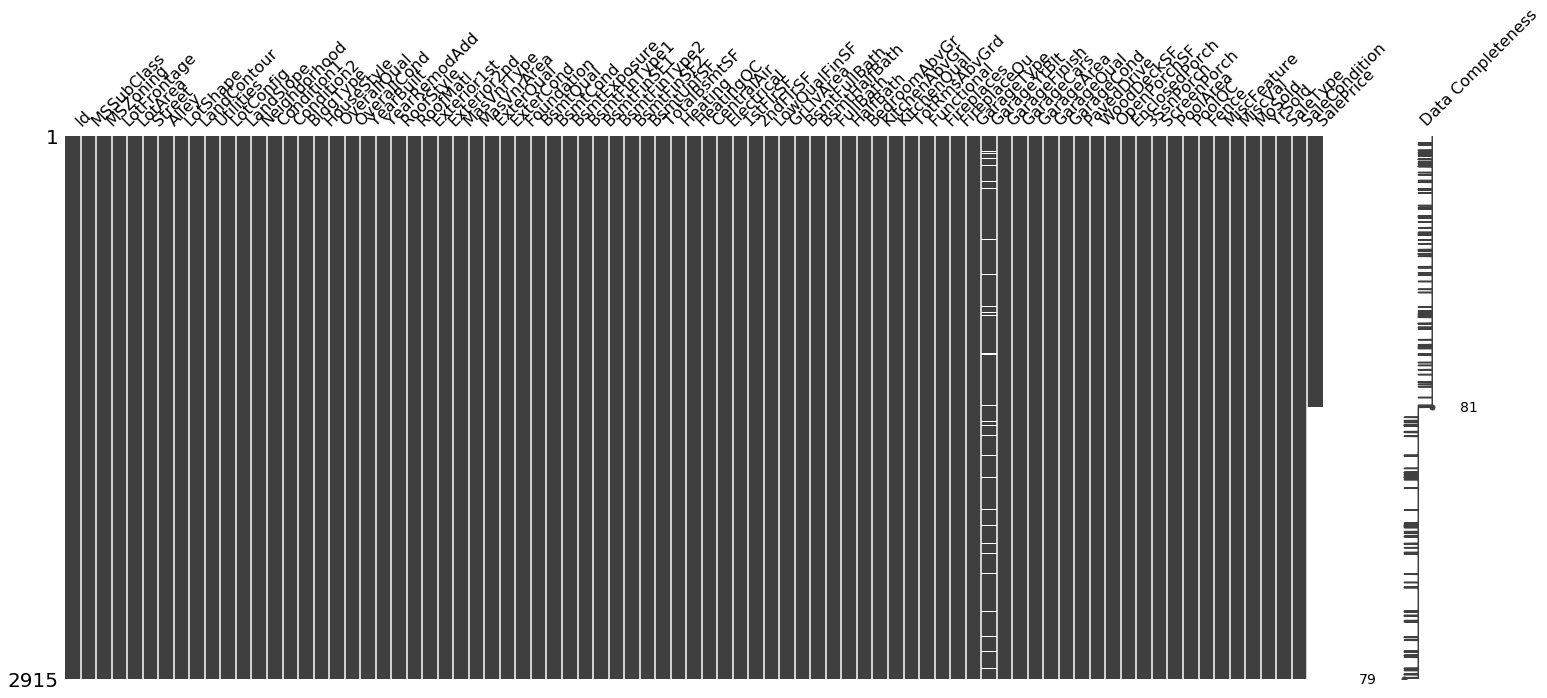

In [23]:
msno.matrix(data1,labels=True)

In [24]:
def sequence(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='missing'):
        r = 4
    else:
        r = 5
    return r

In [25]:
data1['ExterQual']=data1['ExterQual'].apply(sequence)

In [26]:
data1['ExterCond'] = data1['ExterCond'].apply(sequence)
data1['KitchenQual'] = data1['KitchenQual'].apply(sequence)
data1['HeatingQC'] = data1['HeatingQC'].apply(sequence)
data1['BsmtQual'] = data1['BsmtQual'].apply(sequence)
data1['BsmtCond'] = data1['BsmtCond'].apply(sequence)
data1['FireplaceQu'] = data1['FireplaceQu'].apply(sequence)
data1['GarageQual'] = data1['GarageQual'].apply(sequence)
data1['PoolQC'] = data1['PoolQC'].apply(sequence)

In [27]:
data1['TotalSF']=data1['TotalBsmtSF']+data1['1stFlrSF']+data1['2ndFlrSF']

In [29]:
data1['WoodDeckSF']=data1['WoodDeckSF'].apply(lambda x: False*1 if x==0 else True*1)

In [30]:
data1['WoodDeckSF']

0       0
1       1
2       0
3       0
4       1
       ..
2910    0
2911    0
2912    1
2913    1
2914    1
Name: WoodDeckSF, Length: 2915, dtype: int64

In [32]:
data1['HasOpenPorch'] = (data1['OpenPorchSF'] == 0) * 1
data1['HasEnclosedPorch'] = (data1['EnclosedPorch'] == 0) * 1
data1['Has3SsnPorch'] = (data1['3SsnPorch'] == 0) * 1
data1['HasScreenPorch'] = (data1['ScreenPorch'] == 0) * 1

In [33]:
data1['YearsSinceRemodel'] =data1['YrSold'].astype(int) - data1['YearRemodAdd'].astype(int)

In [35]:
data1.OverallCond.dtype

dtype('int64')

In [36]:
data1['Total_Home_Quality'] = data1['OverallQual'] + data1['OverallCond']